In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_set=pd.read_csv("Wine.csv")
data_set.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
x=data_set.iloc[:,:-1]
y=data_set.iloc[:,-1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x.shape

(178, 13)

In [42]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Aplying PCA

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train2=pca.fit_transform(x_train2)
x_test2=pca.transform(x_test2)
explained_variance2=pca.explained_variance_ratio_

In [45]:
x_train2.shape

(142, 2)

In [ ]:
#applying Logistic Regression


In [48]:
from sklearn.linear_model import LogisticRegression
log_reg2=LogisticRegression()
log_reg.fit(x_train2,y_train2)
log_pred2=log_reg.predict(x_test2)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2,log_pred2)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [52]:
accuracy=(15+14+6)/(15+15+6+1)
accuracy

0.9459459459459459

In [80]:
from  matplotlib.colors import ListedColormap
x_set,y_set=x_train2,y_train2
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                np.arange(start=x_set[:,1].min()-1,stop=x_set[:,0].max()+1,step=0.01 ))
plt.contourf(x1,x2, log_reg2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('black','blue','green'))(i),label=j)
    
plt.title("Logistic regrssion(testing)")
plt.xlabel("LDA")
plt.ylabel("LDA")
plt.legend()
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


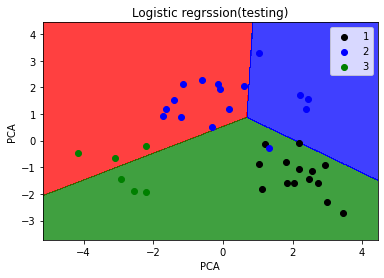

In [77]:
from  matplotlib.colors import ListedColormap
x_set,y_set=x_test2,y_test2
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                np.arange(start=x_set[:,1].min()-1,stop=x_set[:,0].max()+1,step=0.01 ))
plt.contourf(x1,x2, log_reg3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('black','blue','green'))(i),label=j)
    
plt.title("Logistic regrssion(testing)")
plt.xlabel("PCA")
plt.ylabel("PCA")
plt.legend()
plt.show()

In [ ]:
#With Simple Logistic Regression

In [39]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train1,y_train1)
log_pred1=log_reg.predict(x_test1)

In [50]:
confusion_matrix(y_test1,log_pred1)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [ ]:
#it gives 100% accuracy it is the condition of overfitting so we use pca with less of time complexity and space complexity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


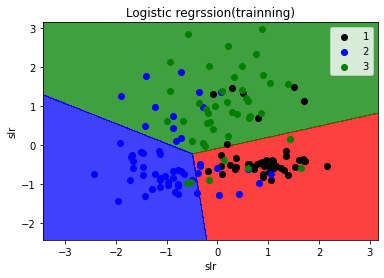

In [81]:
from  matplotlib.colors import ListedColormap
x_set,y_set=x_train1,y_train1
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                np.arange(start=x_set[:,1].min()-1,stop=x_set[:,0].max()+1,step=0.01 ))
plt.contourf(x1,x2, log_reg.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('black','blue','green'))(i),label=j)
    
plt.title("Logistic regrssion(trainning)")
plt.xlabel("slr")
plt.ylabel("slr")
plt.legend()
plt.show()

In [ ]:
from  matplotlib.colors import ListedColormap
x_set,y_set=x_test3,y_test3
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                np.arange(start=x_set[:,1].min()-1,stop=x_set[:,0].max()+1,step=0.01 ))
plt.contourf(x1,x2, log_reg3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('black','blue','green'))(i),label=j)
    
plt.title("Logistic regrssion(testing)")
plt.xlabel("LDA")
plt.ylabel("LDA")
plt.legend()
plt.show()

# Applying LDA

In [53]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=None)
x_train3=lda.fit_transform(x_train3,y_train3)
x_test3=lda.transform(x_test3)
explained_variance3=lda.explained_variance_ratio_


In [62]:
x_train3.shape

(142, 2)

In [63]:
explained_variance3

array([0.73931691, 0.26068309])

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg3=LogisticRegression()
log_reg3.fit(x_train3,y_train3)
log_pred3=log_reg3.predict(x_test3)

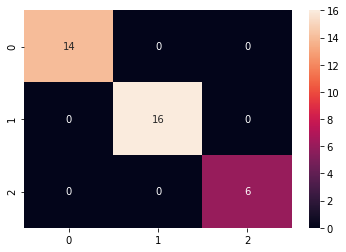

In [66]:
sns.heatmap(confusion_matrix(y_test3,log_pred3),annot=True)

In [ ]:
#here accuracy becomes 100% . this method is used in Large data_set and pca is used in small data_set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


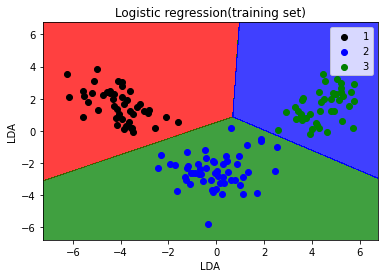

In [73]:
from  matplotlib.colors import ListedColormap
x_set,y_set=x_train3,y_train3
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                np.arange(start=x_set[:,1].min()-1,stop=x_set[:,0].max()+1,step=0.01 ))
plt.contourf(x1,x2, log_reg3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('black','blue','green'))(i),label=j)
    
plt.title("Logistic regression(training set)")
plt.xlabel("LDA")
plt.ylabel("LDA")
plt.legend()
plt.show()
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


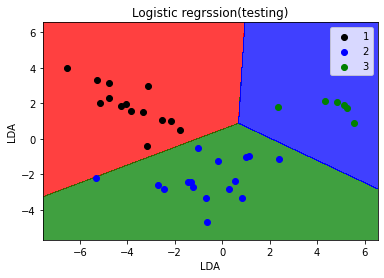

In [74]:
from  matplotlib.colors import ListedColormap
x_set,y_set=x_test3,y_test3
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                np.arange(start=x_set[:,1].min()-1,stop=x_set[:,0].max()+1,step=0.01 ))
plt.contourf(x1,x2, log_reg3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('black','blue','green'))(i),label=j)
    
plt.title("Logistic regrssion(testing)")
plt.xlabel("LDA")
plt.ylabel("LDA")
plt.legend()
plt.show()